In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re

In [4]:
URL = " https://economictimes.indiatimes.com/?from=mdr"
r = requests.get(URL)

b'<!DOCTYPE html><html class="no-js" lang="en"><head><META http-equiv="Content-Type" content="text/html; charset=UTF-8"><script>(function(){function m(u){var s=u+"=",b=document.cookie.split(";");for(var r=0;r<b.length;r++){var t=b[r];while(t.charAt(0)==" "){t=t.substring(1,t.length)}if(t.indexOf(s)==0){return t.substring(s.length,t.length)}}return null}var l=JSON.parse(localStorage.getItem("jStorage")||"{}")||{},c=l["prime_"+m("TicketId")]||{},q=l.userInfo,g=m("ssoid"),i=c.permissions||[],e=i.indexOf("subscribed")>-1?1:0,k="et_nhp_"+g,d=window.localStorage&&localStorage.getItem(k)||"",h=d.split("-"),n=document.getElementsByTagName("html")[0],p=location.href,o=(p.indexOf("dev8243")!=-1||p.indexOf("stg.")!=-1?0:1),a=new Date().getTime(),j=60*60*1000;\nfunction f(){window.location.href="/default_prime.cms"}if(e&&q.email&&p.indexOf("dev=1")==-1){f()}})();<!--/defaultp_redirection.cms?minify=1potime:23--></script><link href="//economictimes.indiatimes.com/icons/etfavicon.ico" rel="shortcut 
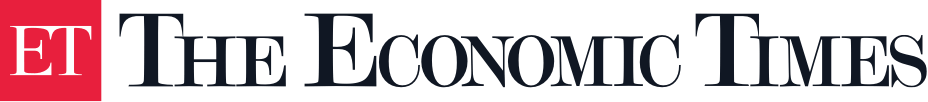

In [5]:
r.content

<!DOCTYPE html>
<html class="no-js" lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script>(function(){function m(u){var s=u+"=",b=document.cookie.split(";");for(var r=0;r<b.length;r++){var t=b[r];while(t.charAt(0)==" "){t=t.substring(1,t.length)}if(t.indexOf(s)==0){return t.substring(s.length,t.length)}}return null}var l=JSON.parse(localStorage.getItem("jStorage")||"{}")||{},c=l["prime_"+m("TicketId")]||{},q=l.userInfo,g=m("ssoid"),i=c.permissions||[],e=i.indexOf("subscribed")>-1?1:0,k="et_nhp_"+g,d=window.localStorage&&localStorage.getItem(k)||"",h=d.split("-"),n=document.getElementsByTagName("html")[0],p=location.href,o=(p.indexOf("dev8243")!=-1||p.indexOf("stg.")!=-1?0:1),a=new Date().getTime(),j=60*60*1000;
function f(){window.location.href="/default_prime.cms"}if(e&&q.email&&p.indexOf("dev=1")==-1){f()}})();<!--/defaultp_redirection.cms?minify=1potime:23--></script><link href="//economictimes.indiatimes.com/icons/etfavicon.ico" rel="shortcut i
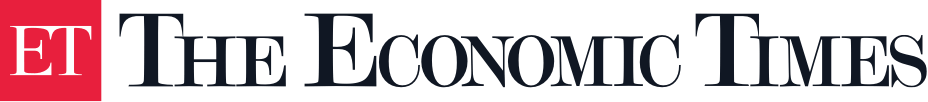

In [6]:
soup = BeautifulSoup(r.content, 'html5lib')
soup

In [7]:
news = []

In [8]:
for a in soup.findAll('a',href = True,attrs={'class':'tle_wrp'}):
    name=a.find('span', attrs={'class':'str_title'})
    news.append(name.text)
news

["How mutual fund managers' stock picks of last 8 years have performed",
 "Trader's Guide: These 2 stocks can rise over 5% each in short term",
 'Hindalco Industries: short term sideways',
 'Will TCS, Wipro and the likes crack the consulting code this time?',
 'One step forward, two backwards: India’s wait for a sensible data law',
 'Stock Radar: Why DLF could hit fresh 52-week high in December?']

In [9]:
HrefUrl=[]
for a in soup.findAll('a',href=True ,attrs={'class':'tle_wrp'}):
    HrefUrl.append(a['href'])

In [10]:
HrefUrl

['/wealth/invest/how-mutual-fund-managers-stock-picks-of-last-8-years-have-performed/articleshow/95619332.cms',
 '/markets/stocks/news/traders-guide-these-2-stocks-can-rise-over-5-each-in-short-term/articleshow/95673287.cms',
 '/markets/stocks/news/hindalco-industries-short-term-sideways/articleshow/95674121.cms',
 '/prime/technology-and-startups/indian-big-techs-affair-with-consulting-will-tcs-wipro-and-the-likes-strike-gold-this-time/primearticleshow/95670251.cms',
 '/prime/technology-and-startups/one-step-forward-and-two-steps-backwards-indias-continuing-wait-for-sensible-data-protection/primearticleshow/95668394.cms',
 '/markets/stocks/news/stock-radar-why-dlf-could-hit-fresh-52-week-high-in-december/articleshow/95662749.cms']

In [14]:
data=pd.DataFrame(zip(news,HrefUrl),columns=('News','URL'))

In [15]:
data

,News,URL
0,How mutual fund managers' stock picks of last ...,/wealth/invest/how-mutual-fund-managers-stock-...
1,Trader's Guide: These 2 stocks can rise over 5...,/markets/stocks/news/traders-guide-these-2-sto...
2,Hindalco Industries: short term sideways,/markets/stocks/news/hindalco-industries-short...
3,"Will TCS, Wipro and the likes crack the consul...",/prime/technology-and-startups/indian-big-tech...
4,"One step forward, two backwards: India’s wait ...",/prime/technology-and-startups/one-step-forwar...
5,Stock Radar: Why DLF could hit fresh 52-week h...,/markets/stocks/news/stock-radar-why-dlf-could...
